In [1]:
# imports
import pandas as pd

In [2]:
# load in data
df_1 = pd.read_csv('/Users/josephbell/Downloads/SPX_hr5aqh2 2/SPX_2000_2009.txt', sep=",", header=None,
                names=["DateTime", "Open", "High", "Low", "Close"])
print(df_1.shape)
df_1.head()

(266973, 5)


,DateTime,Open,High,Low,Close
0,2007-04-30 09:30:00,1494.07,1494.89,1494.07,1494.89
1,2007-04-30 09:31:00,1494.60,1494.60,1494.48,1494.48
2,2007-04-30 09:32:00,1494.49,1494.82,1494.49,1494.77
3,2007-04-30 09:33:00,1494.84,1495.32,1494.84,1495.29
4,2007-04-30 09:34:00,1495.36,1495.36,1494.98,1495.09


In [3]:
# load in data
df_2 = pd.read_csv('/Users/josephbell/Downloads/SPX_hr5aqh2 2/SPX_2010_2019.txt', sep=",", header=None,
                names=["DateTime", "Open", "High", "Low", "Close"])
print(df_2.shape)
df_2.head()

(992768, 5)


,DateTime,Open,High,Low,Close
0,2010-01-04 09:30:00,1116.56,1122.15,1116.56,1122.15
1,2010-01-04 09:31:00,1122.65,1123.80,1122.65,1123.80
2,2010-01-04 09:32:00,1123.96,1124.23,1123.95,1124.23
3,2010-01-04 09:33:00,1124.27,1124.27,1124.05,1124.23
4,2010-01-04 09:34:00,1124.17,1124.29,1124.17,1124.26


In [4]:
# load in data
df_3 = pd.read_csv('/Users/josephbell/Downloads/SPX_hr5aqh2 2/SPX_2020_2020.txt', sep=",", header=None,
                names=["DateTime", "Open", "High", "Low", "Close"])
print(df_3.shape)
df_3.head()

(90339, 5)


,DateTime,Open,High,Low,Close
0,2020-01-02 09:30:00,3244.67,3247.40,3244.67,3247.22
1,2020-01-02 09:31:00,3247.19,3247.22,3245.01,3245.22
2,2020-01-02 09:32:00,3245.07,3245.54,3244.16,3244.66
3,2020-01-02 09:33:00,3244.89,3247.69,3244.89,3247.61
4,2020-01-02 09:34:00,3247.38,3248.08,3246.92,3246.92


In [5]:
# concatenate dataframes
frames = [df_1, df_2, df_3]
df = pd.concat(frames)
print(df.shape)
df.head()

(1350080, 5)


,DateTime,Open,High,Low,Close
0,2007-04-30 09:30:00,1494.07,1494.89,1494.07,1494.89
1,2007-04-30 09:31:00,1494.60,1494.60,1494.48,1494.48
2,2007-04-30 09:32:00,1494.49,1494.82,1494.49,1494.77
3,2007-04-30 09:33:00,1494.84,1495.32,1494.84,1495.29
4,2007-04-30 09:34:00,1495.36,1495.36,1494.98,1495.09


In [6]:
# TODO - concatenate multiple txt files to include all data in the dataset - X
# separate out date and time or leave? - X
# look at price perecentage gain of each day from 3:30 pm to 3:40, 3:50, 4:00 pm 
# see if there is any pattern
# could compare it to other 30 minute intervals

In [7]:
# split date and time into two separate columns
df[['Date','Time']] = df.DateTime.str.split(" ",expand=True)
df = df[['Date', 'Time', 'Open', 'High', 'Low', 'Close']]
df.head()

,Date,Time,Open,High,Low,Close
0,2007-04-30,09:30:00,1494.07,1494.89,1494.07,1494.89
1,2007-04-30,09:31:00,1494.60,1494.60,1494.48,1494.48
2,2007-04-30,09:32:00,1494.49,1494.82,1494.49,1494.77
3,2007-04-30,09:33:00,1494.84,1495.32,1494.84,1495.29
4,2007-04-30,09:34:00,1495.36,1495.36,1494.98,1495.09


In [8]:
# convert datetime to pandas
df['Date'] = pd.to_datetime(df['Date'])

In [9]:
# for each day we need to take the 3:30 pm price / the 4:00 pm price
ramp = df[(df['Time'] == '15:30:00') | (df['Time'] == '15:59:00')]
print(ramp.shape)
ramp.tail()

(6772, 6)


,Date,Time,Open,High,Low,Close
89534,2020-09-10,15:59:00,3343.67,3343.67,3337.37,3338.12
90267,2020-09-11,15:30:00,3347.13,3350.44,3347.13,3349.59
90268,2020-09-11,15:30:00,3347.13,3350.44,3347.13,3349.59
90325,2020-09-11,15:59:00,3342.92,3343.35,3341.10,3341.38
90326,2020-09-11,15:59:00,3342.92,3343.35,3341.10,3341.38


In [10]:
# looks like there are some duplicates with same date and timestamp towards the end
ramp = ramp.drop_duplicates()
print(ramp.shape)
ramp.tail()

(6668, 6)


,Date,Time,Open,High,Low,Close
88741,2020-09-09,15:59:00,3400.13,3401.45,3397.27,3399.02
89475,2020-09-10,15:30:00,3340.39,3340.39,3336.96,3338.90
89533,2020-09-10,15:59:00,3343.67,3343.67,3337.37,3338.12
90267,2020-09-11,15:30:00,3347.13,3350.44,3347.13,3349.59
90325,2020-09-11,15:59:00,3342.92,3343.35,3341.10,3341.38


In [11]:
# data does not include weekends and holidays...only trading days
# so we don't have to fix that like in other datasets!

In [12]:
# TODO - calculate the return from 3:30 pm to 4:00 pm each day
ramp['Time'].value_counts()
# looks like an odd number of times? should be even!

15:30:00    3334
15:59:00    3334
Name: Time, dtype: int64

In [13]:
# ramp = ramp.set_index('Date')
# ramp

In [14]:
# calculate percentage change 
ramp['3:30 Price'] = ramp['Open'].shift(1)
ramp['Percentage Change'] = (ramp['Open'] / ramp['3:30 Price']) - 1
ramp

,Date,Time,Open,High,Low,Close,3:30 Price,Percentage Change
360,2007-04-30,15:30:00,1487.87,1487.94,1487.86,1487.92,NaN,NaN
389,2007-04-30,15:59:00,1483.11,1483.11,1482.31,1482.31,1487.87,-0.003199
759,2007-05-01,15:30:00,1484.05,1484.05,1484.00,1484.02,1483.11,0.000634
788,2007-05-01,15:59:00,1485.76,1486.12,1485.76,1486.12,1484.05,0.001152
1157,2007-05-02,15:30:00,1496.86,1496.97,1496.86,1496.92,1485.76,0.007471
...,...,...,...,...,...,...,...,...
88741,2020-09-09,15:59:00,3400.13,3401.45,3397.27,3399.02,3422.37,-0.006498
89475,2020-09-10,15:30:00,3340.39,3340.39,3336.96,3338.90,3400.13,-0.017570
89533,2020-09-10,15:59:00,3343.67,3343.67,3337.37,3338.12,3340.39,0.000982
90267,2020-09-11,15:30:00,3347.13,3350.44,3347.13,3349.59,3343.67,0.001035


In [15]:
# change format to % for readability
ramp['% Change'] = ramp['Percentage Change'].map(lambda x: "{0:.2f}%".format(x*100))
ramp

,Date,Time,Open,High,Low,Close,3:30 Price,Percentage Change,% Change
360,2007-04-30,15:30:00,1487.87,1487.94,1487.86,1487.92,NaN,NaN,nan%
389,2007-04-30,15:59:00,1483.11,1483.11,1482.31,1482.31,1487.87,-0.003199,-0.32%
759,2007-05-01,15:30:00,1484.05,1484.05,1484.00,1484.02,1483.11,0.000634,0.06%
788,2007-05-01,15:59:00,1485.76,1486.12,1485.76,1486.12,1484.05,0.001152,0.12%
1157,2007-05-02,15:30:00,1496.86,1496.97,1496.86,1496.92,1485.76,0.007471,0.75%
...,...,...,...,...,...,...,...,...,...
88741,2020-09-09,15:59:00,3400.13,3401.45,3397.27,3399.02,3422.37,-0.006498,-0.65%
89475,2020-09-10,15:30:00,3340.39,3340.39,3336.96,3338.90,3400.13,-0.017570,-1.76%
89533,2020-09-10,15:59:00,3343.67,3343.67,3337.37,3338.12,3340.39,0.000982,0.10%
90267,2020-09-11,15:30:00,3347.13,3350.44,3347.13,3349.59,3343.67,0.001035,0.10%


In [16]:
# look at end of day rows only to get percentage change for the last half hour
ramp = ramp[(ramp['Time'] == '15:59:00')] #& (ramp['Date'] > '2016-01-01')]
ramp

,Date,Time,Open,High,Low,Close,3:30 Price,Percentage Change,% Change
389,2007-04-30,15:59:00,1483.11,1483.11,1482.31,1482.31,1487.87,-0.003199,-0.32%
788,2007-05-01,15:59:00,1485.76,1486.12,1485.76,1486.12,1484.05,0.001152,0.12%
1186,2007-05-02,15:59:00,1495.91,1495.91,1495.67,1495.77,1496.86,-0.000635,-0.06%
1583,2007-05-03,15:59:00,1501.96,1502.25,1501.96,1502.13,1502.91,-0.000632,-0.06%
1981,2007-05-04,15:59:00,1505.03,1505.40,1505.03,1505.40,1505.96,-0.000618,-0.06%
...,...,...,...,...,...,...,...,...,...
87157,2020-09-04,15:59:00,3427.94,3431.02,3426.73,3426.73,3451.01,-0.006685,-0.67%
87949,2020-09-08,15:59:00,3336.28,3336.28,3329.27,3331.67,3350.20,-0.004155,-0.42%
88741,2020-09-09,15:59:00,3400.13,3401.45,3397.27,3399.02,3422.37,-0.006498,-0.65%
89533,2020-09-10,15:59:00,3343.67,3343.67,3337.37,3338.12,3340.39,0.000982,0.10%


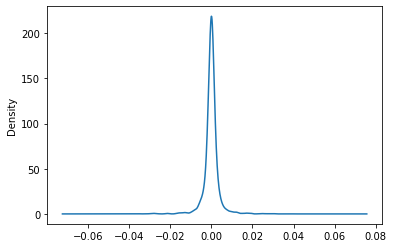

In [19]:
ax = ramp['Percentage Change'].plot.kde()

In [18]:
ramp['Percentage Change'].describe()

count    3334.000000
mean       -0.000020
std         0.003843
min        -0.035469
25%        -0.001146
50%         0.000024
75%         0.001120
max         0.038591
Name: Percentage Change, dtype: float64